In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from utils.fourier_transform import apply_2d_low_pass_filter, calculate_dft2, calculate_idft2, plot_2d_ft_spectrum
from utils.image_conversion import convert_with_alpha_channel

In [ ]:
# for filename in os.listdir("./data/test"):
#     file_path = os.path.join("./data/test", filename)
img = cv2.imread("5.34.5.png", cv2.IMREAD_GRAYSCALE)
spectrum = calculate_dft2(img)
plot_2d_ft_spectrum(spectrum)

In [ ]:
low_pass_spectrum = apply_2d_low_pass_filter(spectrum, threshold=30)
plot_2d_ft_spectrum(low_pass_spectrum)

In [ ]:
image = calculate_idft2(low_pass_spectrum)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(image)
plt.show()

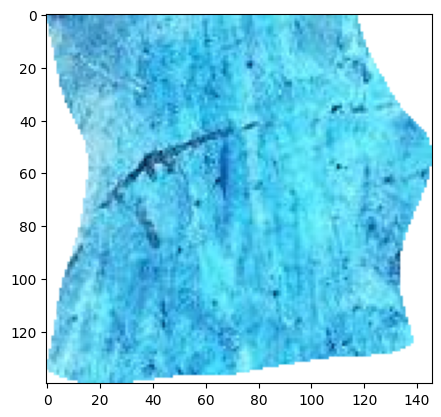

In [3]:
img = cv2.imread("5.34.5.png", cv2.IMREAD_UNCHANGED)
plt.imshow(img)
plt.show()

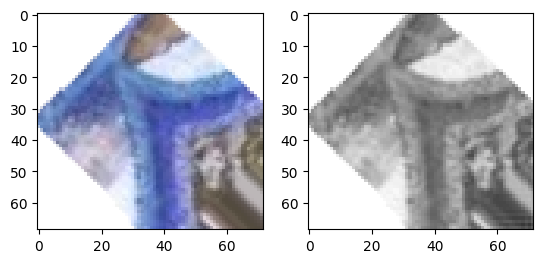

In [11]:
img = cv2.imread("5.32.38.png", cv2.IMREAD_UNCHANGED)
b, g, r, a = cv2.split(img)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

spectrum = calculate_dft2(gray_image)
low_pass_spectrum = apply_2d_low_pass_filter(spectrum, threshold=30)

image = calculate_idft2(low_pass_spectrum).astype(np.uint8)
rgb_image = np.dstack((image, image, image, a))

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(rgb_image)
plt.show()

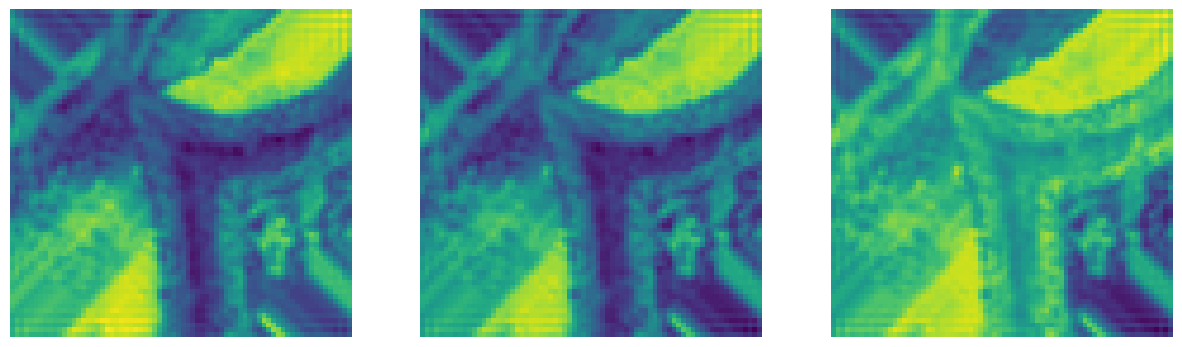

In [7]:
blue_spectrum = calculate_dft2(b)
blue_low_pass_spectrum = apply_2d_low_pass_filter(blue_spectrum, threshold=30)

green_spectrum = calculate_dft2(g)
green_low_pass_spectrum = apply_2d_low_pass_filter(green_spectrum, threshold=30)

red_spectrum = calculate_dft2(r)
red_low_pass_spectrum = apply_2d_low_pass_filter(red_spectrum, threshold=30)

blue_image = calculate_idft2(blue_low_pass_spectrum)
green_image = calculate_idft2(green_low_pass_spectrum)
red_image = calculate_idft2(red_low_pass_spectrum)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
images = [blue_image, green_image, red_image]

for i, ax in enumerate(axes):
    ax.imshow(images[i])  # Adjust the colormap if images are not grayscale
    ax.axis('off')

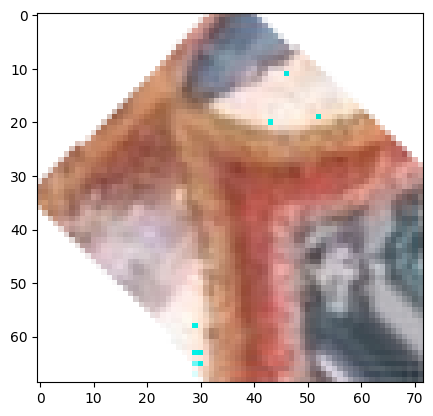

In [19]:
low_pass_image = cv2.merge((red_image.astype(np.uint8), green_image.astype(np.uint8), blue_image.astype(np.uint8), a)).astype(np.uint8)

plt.imshow(low_pass_image)
plt.show()